In [71]:
cd drive/MyDrive/10707/src

[Errno 2] No such file or directory: 'drive/MyDrive/10707/src'
/content/drive/.shortcut-targets-by-id/1mLIpKobxLqDPVzGz-XXAA4JO-lEjQbax/10707/src


In [72]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd

In [73]:
with open("saved_models/metrics.pickle","rb") as f:
  metrics = pickle.load(f)

In [74]:
methods = list(set([x.split(',')[0] for x in metrics.keys()]))

In [75]:
methods = ['last_linear','all_linears','from_pretrained','from_scratch']
lrs = [0.01,0.0001,0.000001]
fracs = [1,0.7,0.3]
train_tests = [0.8,0.5,0.2]
batch_sizes = [32,128,256]
optimizers = ['adam','sgd','rmsprop']

In [76]:
results = {}

for method in methods:
  results[method] = []

In [77]:
for config in metrics.keys():

  method = config.split(',')[0]
  results[method].append((config.split(',')[1:],max(metrics[config]['val_acc'])))

In [78]:
metrics.keys()

dict_keys(['last_linear,0.01,1,0.8,32,adam', 'last_linear,0.01,1,0.8,32,sgd', 'last_linear,0.01,1,0.8,32,rmsprop', 'last_linear,0.01,1,0.8,128,adam', 'last_linear,0.01,1,0.8,128,sgd', 'last_linear,0.01,1,0.8,128,rmsprop', 'last_linear,0.01,1,0.8,256,adam', 'last_linear,0.01,1,0.8,256,sgd', 'last_linear,0.01,1,0.8,256,rmsprop', 'last_linear,0.01,1,0.5,32,adam', 'last_linear,0.01,1,0.5,32,sgd', 'last_linear,0.01,1,0.5,32,rmsprop', 'last_linear,0.01,1,0.5,128,adam', 'last_linear,0.01,1,0.5,128,sgd', 'last_linear,0.01,1,0.5,128,rmsprop', 'last_linear,0.01,1,0.5,256,adam', 'last_linear,0.01,1,0.5,256,sgd', 'last_linear,0.01,1,0.5,256,rmsprop', 'last_linear,0.01,1,0.2,32,adam', 'last_linear,0.01,1,0.2,32,sgd', 'last_linear,0.01,1,0.2,32,rmsprop', 'last_linear,0.01,1,0.2,128,adam', 'last_linear,0.01,1,0.2,128,sgd', 'last_linear,0.01,1,0.2,128,rmsprop', 'last_linear,0.01,1,0.2,256,adam', 'last_linear,0.01,1,0.2,256,sgd', 'last_linear,0.01,1,0.2,256,rmsprop', 'last_linear,0.01,0.7,0.8,32,adam',

In [79]:
color_lr = {
    '0.01' : 'k',
    '0.0001' : 'b',
    '1e-06' : 'r'
}


markers_opt = {
    'adam' : 's',
    'sgd' : '+',
    'rmsprop' : 'x'
}

linewidth_batch = {
    '32' : 0.4,
    '128': 0.8,
    '256': 1.2,
}

In [80]:
results = pd.DataFrame(columns = ['method','frac','train_test','optimizer','lr','batch_size','val_acc'])

In [86]:
!ls

analysis_runs.ipynb  figs	   __pycache__	 train.py
data		     models.py	   run.ipynb	 transfer_learning.ipynb
dataset.py	     optimizer.py  saved_models  utils.py


In [93]:
plt.rcParams.update({'font.size': 15})

In [99]:
# Iterate over full data settings
for method in methods:

  # Iterate over different methods
  for frac in fracs:

    # Iterate over train_test:
    for train_test in train_tests:
      
      plt.figure(figsize = (10,5))

      # plt.title(f'{method} , Data : {frac} ,train_test : {train_test}')
        
      for config in metrics.keys():
        
        config_ = config.split(',')

        if config_[0] == method and str(config_[2]) == str(frac) and str(config_[3]) == str(train_test):

          plt.plot(metrics[config]['val_acc'],label = f'LR:{config_[1]},Batch Size:{config_[4]},Optimizer:{config_[5]}',
                     c = color_lr[config_[1]], 
                     marker = markers_opt[config_[5]],
                     markevery = 10,
                     linewidth = linewidth_batch[config_[4]])
          
          
          results = results.append({
              'method' : method,
              'frac' : frac,
              'train_test': train_test, 
              'optimizer' : config_[5],
              'lr' : config_[1],
              'batch_size' : config_[4],
              'val_acc' : max(metrics[config]['val_acc'])
              }, ignore_index = True)
          
      
      plt.xlabel('Epochs')
      plt.ylabel('Validation Accuracy')
      plt.ylim(0,1)

      plt.savefig(f'figs/accuracies/{method},Data : {frac},train_test : {train_test}.png')
      plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [84]:
grouped_results = results.groupby(['method','frac','train_test'])

In [ ]:
group_keys = grouped_results.groups.keys()

In [102]:
import seaborn as sns

In [134]:
for key in group_keys:

  print(key)
  
  # Get group
  group = grouped_results.get_group(key).loc[:,['optimizer','lr','batch_size','val_acc']]

  plt.figure(figsize = (25,5))
  
  plt.subplot(1,3,1)
  sns.violinplot(x = 'lr',
               y = 'val_acc',
              data = group,
              split = True,
              )
  sns.swarmplot(x = 'lr',
               y = 'val_acc',
              data = group,
              color = 'k')
  plt.ylim(0,1)


  # optim
  plt.subplot(1,3,2)
  sns.violinplot(x = 'optimizer',
               y = 'val_acc',
              data = group,
              split = True
              )
  sns.swarmplot(x = 'optimizer',
               y = 'val_acc',
              data = group,
              color = 'k')
  plt.ylim(0,1)

  # batch_size
  plt.subplot(1,3,3)
  sns.violinplot(x = 'batch_size',
               y = 'val_acc',
              data = group,
              scale = 'count',
              split = True
              )
  sns.swarmplot(x = 'batch_size',
               y = 'val_acc',
              data = group,
              color = 'k')
  plt.ylim(0,1)

  plt.savefig(f'figs/hyperparams/{key}.png')

  plt.show()

Output hidden; open in https://colab.research.google.com to view.

('all_linears', 0.3, 0.2)


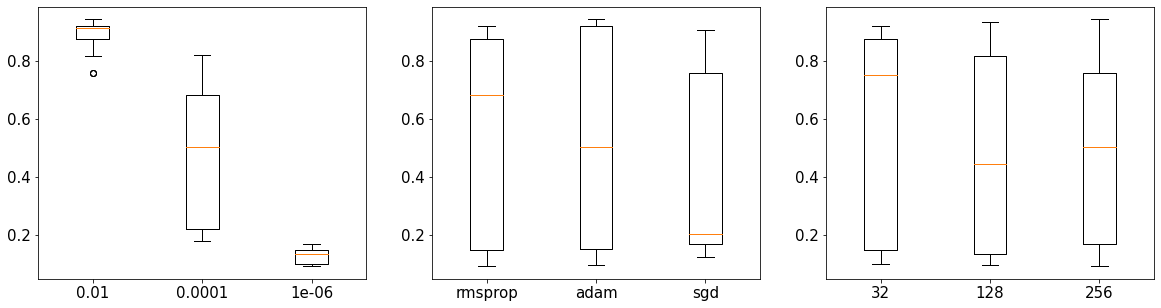

('all_linears', 0.3, 0.5)


KeyboardInterrupt: ignored

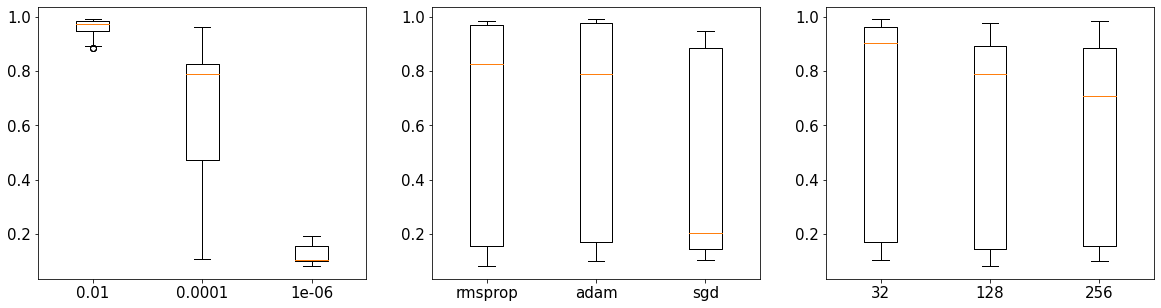

In [101]:
for key in group_keys:

  print(key)
  
  # Get group
  group = grouped_results.get_group(key).loc[:,['optimizer','lr','batch_size','val_acc']]

  plt.figure(figsize = (20,5))
  
  # lr
  lr_groups = group.groupby('lr')
  
  lrs_box = []
  lrs_labels = []
  for lr_group in lr_groups:
    lrs_box.append(lr_group[1]['val_acc'])
    lrs_labels.append(lr_group[0])

  order = [1,0,2]
  lrs_labels = [lrs_labels[i] for i in order]
  lrs_box= [lrs_box[i] for i in order]

  plt.subplot(1,3,1)
  plt.boxplot(lrs_box)
  ax = plt.gca()
  ax.set_xticklabels(lrs_labels)


  # optim
  optim_groups = group.groupby('optimizer')
  
  optim_box = []
  optim_labels = []
  for optim_group in optim_groups:
    optim_box.append(optim_group[1]['val_acc'])
    optim_labels.append(optim_group[0])

  order = [1,0,2]
  optim_labels = [optim_labels[i] for i in order]
  optim_box= [optim_box[i] for i in order]

  plt.subplot(1,3,2)
  plt.boxplot(optim_box)
  ax = plt.gca()
  ax.set_xticklabels(optim_labels)

  # batch_size
  batch_groups = group.groupby('batch_size')
  
  batch_box = []
  batch_labels = []
  for batch_group in batch_groups:
    batch_box.append(batch_group[1]['val_acc'])
    batch_labels.append(batch_group[0])

  order = [2,0,1]
  batch_labels = [batch_labels[i] for i in order]
  batch_box= [batch_box[i] for i in order]

  plt.subplot(1,3,3)
  plt.boxplot(batch_box)
  ax = plt.gca()
  ax.set_xticklabels(batch_labels)

  plt.savefig(f'figs/{key}.png')

  plt.show()